<a href="https://colab.research.google.com/github/wnoyan/Machine-Learning/blob/master/Implementation%20of%20ANN%20from%20Scratch%20in%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Required Libraries

In [ ]:
# Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generating Random Dataset

In [ ]:
# Generating Random Dataset

X = np.vstack([(np.random.rand(10, 2)*5), (np.random.rand(10, 2)*10)])
Y = np.hstack([[0]*10, [1]*10])

dataset = pd.DataFrame(X, columns={'X1', 'X2'})
dataset['Y'] = Y

dataset

,X1,X2,Y
0,2.170478,3.641875,0
1,1.894391,3.182347,0
2,3.357907,4.041632,0
3,1.717410,2.913355,0
4,3.456637,2.046514,0
5,4.619519,3.848021,0
6,1.129380,0.403607,0
7,4.281726,0.761292,0
8,2.137111,4.783988,0
9,4.628092,2.616303,0


## Ploting Dataset Values

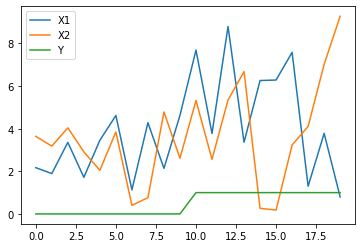

In [ ]:
# Ploting Dataset Values

plt.plot(dataset, label = 'Inline Label')
plt.legend(['X1', 'X2', 'Y'])

## Converting Target Variable to Vector of Number of Classes

In [ ]:
# Converting Target Variable to Vector of Number of Classes

Z = np.zeros((20, 2))
for i in range(20):
  Z[i, Y[i]] = 1

Z.shape

(20, 2)

## Initiating Random Weights and Bias

In [ ]:
# Initiating Random Weights and Bias

# First Layer Weights and Bias
Wi_1 = np.random.rand(3, 2)
Bi_1 = np.random.rand(3)

# Second Layer Weights and Bias
Wi_2 = np.random.rand(3, 2)
Bi_2 = np.random.rand(2)

print('First Layer Weights: \n', Wi_1)
print('\nFirst Layer Biases: \n', Bi_1)

print('\nSecond Layer Weights: \n', Wi_2)
print('\nSecond Layer Weights: \n', Bi_2)

print('\nTranspose of Wi_1: \n', Wi_1.T)

First Layer Weights: 
 [[0.73774141 0.03571064]
 [0.21668677 0.20852709]
 [0.79491937 0.19255506]]

First Layer Biases: 
 [0.86547172 0.27066248 0.0820989 ]

Second Layer Weights: 
 [[0.56887636 0.45505116]
 [0.72653998 0.12280716]
 [0.69617627 0.10041441]]

Second Layer Weights: 
 [0.87886576 0.35922355]

Transpose of Wi_1: 
 [[0.73774141 0.21668677 0.79491937]
 [0.03571064 0.20852709 0.19255506]]


## Defining the Forward Propagation Function

In [ ]:
# Defining the Forward Propagation Function

def forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2):
  # First Layer
  M = 1 / (1 + np.exp(-(X.dot(Wi_1.T) + Bi_1)))

  # Second Layer
  A = M.dot(Wi_2) + Bi_2
  expA = np.exp(A)
  
  Y = expA / expA.sum(axis=1, keepdims=True)

  return Y, M

In [ ]:
forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2)

(array([[0.84159426, 0.15840574],
        [0.83741176, 0.16258824],
        [0.84940589, 0.15059411],
        [0.8343889 , 0.1656111 ],
        [0.8444532 , 0.1555468 ],
        [0.85291097, 0.14708903],
        [0.8096922 , 0.1903078 ],
        [0.84449753, 0.15550247],
        [0.84513365, 0.15486635],
        [0.85056511, 0.14943489],
        [0.85875972, 0.14124028],
        [0.84742568, 0.15257432],
        [0.85949216, 0.14050784],
        [0.85434138, 0.14565862],
        [0.84995249, 0.15004751],
        [0.84983656, 0.15016344],
        [0.856915  , 0.143085  ],
        [0.83525531, 0.16474469],
        [0.85572181, 0.14427819],
        [0.84815841, 0.15184159]]),
 array([[0.93065387, 0.81763501, 0.92475055],
        [0.91503215, 0.79327123, 0.90031812],
        [0.97031757, 0.86307478, 0.97151838],
        [0.90348088, 0.77735453, 0.88166394],
        [0.97036333, 0.80944739, 0.96172431],
        [0.98800144, 0.88835704, 0.98896078],
        [0.84723471, 0.64555269, 0.7422280

## Backpropagation by Differentiating or Gradient Descent

In [ ]:
# Returns Gradient for Weight_2
def diff_Wi_2(H, Z, Y):
  return H.T.dot(Z - Y)

# Returns Gradient for Weight_1
def diff_Wi_1(X, H, Z, output, Wi_2):
  dZ = (Z - output).dot(Wi_2.T) * H * (1 - H)
  
  return X.T.dot(dZ)

In [ ]:
# Returns Derivative for B2
def diff_B2(Z, Y):
  return (Z - Y).sum(axis=0)

# Returns Gradient for B1
def diff_B1(Z, Y, Wi_2, H):
  return ((Z - Y).dot(Wi_2.T) * H * (1 - H)).sum(axis=0)

In [ ]:
learning_rate = 1e-3

for epoch in range(5000):
  output, hidden = forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2)
  Wi_2 += learning_rate * diff_Wi_2(hidden, Z, output)
  Bi_2 += learning_rate * diff_B2(Z, output)
  Wi_1 += learning_rate * diff_Wi_1(X, hidden, Z, output, Wi_2).T
  Bi_1 += learning_rate * diff_B1(Z, output, Wi_2, hidden)

## Generating Prediction at New Datapoint

In [ ]:
X_test = np.array([10, 10])

hidden_output = 1 / (1 + np.exp(-X_test.dot(Wi_1.T) - Bi_1))
Outer_layer_output = hidden_output.dot(Wi_2) + Bi_2
expA = np.exp(Outer_layer_output)
Y = expA / expA.sum()

print('Prob of Class 0 >>> {} \n Prob of Class 1 >>> {}'.format(Y[0], Y[1]))

Prob of Class 0 >>> 0.2310131845954743 
 Prob of Class 1 >>> 0.7689868154045258
